Import libraries, define a function which calculates the x/y/z coordinates and E and B fields at a fixed radius from a dipole.

Note that all the plots/simulations in this file show the far field of the dipole only (i.e. radiation).

In [1]:
%matplotlib notebook
import numpy as np
from dipole import Hertz_dipole_ff, Magnetic_dipole_ff
import matplotlib.pyplot as plt


nt = 11 # number of theta points
nphi = 10 # number of phi points
T = 1/1e8 # period 
r0 = 1 # radius at which to plot E and B

In [2]:
def generate_xyz_EB_electric(nt, nphi, p, R, f, t, phase, phi_max = 2*np.pi, theta_max = np.pi):

    theta=np.arccos(2*np.linspace(0,1,nt)-1) 
    phi=np.linspace(2*np.pi/nphi,2*np.pi,nphi)
    
    theta = theta[theta <= theta_max]
    phi = phi[phi <= phi_max]

    th_phi = np.meshgrid(theta, phi)
    thetas = th_phi[0].flatten()
    phis = th_phi[1].flatten()

    x = r0*np.sin(thetas)*np.cos(phis)
    y = r0*np.sin(thetas)*np.sin(phis)
    z = r0*np.cos(thetas)

    E = np.zeros((3, len(x)))
    B = np.zeros((3, len(x)))

    for j1 in np.arange(0, len(x)):
        El, Bl = Hertz_dipole_ff(np.array([x[j1], y[j1], z[j1]]), p, R, phase, f, t=t)
        E[:, j1] = El[:,0]
        B[:, j1] = Bl[:,0]

    return x, y, z, E, B

def generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, phi_max = 2*np.pi, theta_max = np.pi):

    theta=np.arccos(2*np.linspace(0,1,nt)-1) 
    phi=np.linspace(2*np.pi/nphi,2*np.pi,nphi)
    
    theta = theta[theta <= theta_max]
    phi = phi[phi <= phi_max]

    th_phi = np.meshgrid(theta, phi)
    thetas = th_phi[0].flatten()
    phis = th_phi[1].flatten()

    x = r0*np.sin(thetas)*np.cos(phis)
    y = r0*np.sin(thetas)*np.sin(phis)
    z = r0*np.cos(thetas)

    E = np.zeros((3, len(x)))
    B = np.zeros((3, len(x)))

    for j1 in np.arange(0, len(x)):
        El, Bl = Magnetic_dipole_ff(np.array([x[j1], y[j1], z[j1]]), p, R, phase, f, t=t)
        E[:, j1] = El[:,0]
        B[:, j1] = Bl[:,0]

    return x, y, z, E, B

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


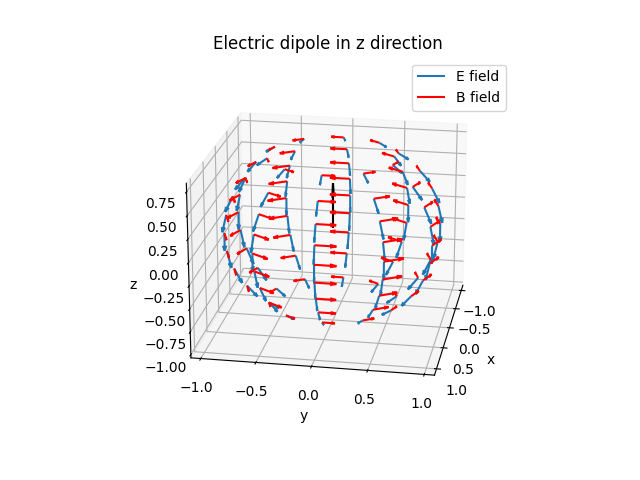

In [3]:
p = np.array([[0, 0, 1e-8]])
R = np.array([[0,0,0]])
f = np.array([1e8])
t = 0
phase = np.array([0])

x, y, z, E, B = generate_xyz_EB_electric(nt, nphi, p, R, f, t, phase)

E_max_mag = max(np.sqrt(sum(E**2, 0)))
B_max_mag = max(np.sqrt(sum(B**2, 0)))

scale_E = 1e-3*r0
scale_B = 1e-3*r0*E_max_mag/B_max_mag

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(0, 0, 0, 0, 0, 0.1, length=5, color='black')
ax.quiver(x, y, z, *E, length=scale_E, label='E field')
ax.quiver(x, y, z, *B, length=scale_B, color='red', label='B field')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=20., azim=10)
plt.title('Electric dipole in z direction')
plt.legend()
plt.show()

The plot above shows the instantaneous E and B fields for an electric dipole in the z-direction, showing the electric fields pointing along the lines of longitude and the magnetic fields pointing along the lines of latitude.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


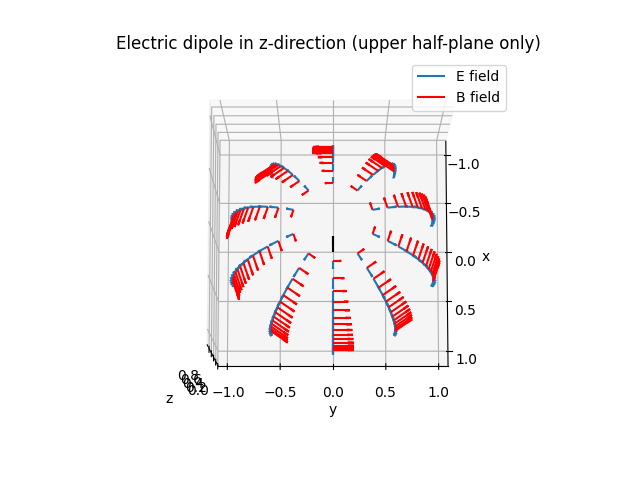

In [4]:
nt=30

x, y, z, E, B = generate_xyz_EB_electric(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)


E_max_mag = max(np.sqrt(sum(E**2, 0)))
B_max_mag = max(np.sqrt(sum(B**2, 0)))

scale_E = 1e-3*r0
scale_B = 1e-3*r0*E_max_mag/B_max_mag


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(0, 0, 0, 0, 0, 0.1, length=5, color='black')
ax.quiver(x, y, z, *E, length=scale_E, label='E field')
ax.quiver(x, y, z, *B, length=scale_B, color='red', label='B field')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=80., azim=0)
plt.title('Electric dipole in z-direction (upper half-plane only)')
plt.legend()
plt.show()

Same as the previous plot, but just showing the field lines in the upper half-plane (z > 0) and looking from above. This shows you have the field strength (length of the vectors) diminishes towards the pole (direction the dipole is pointing in). The field strength at the pole itself is zero.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


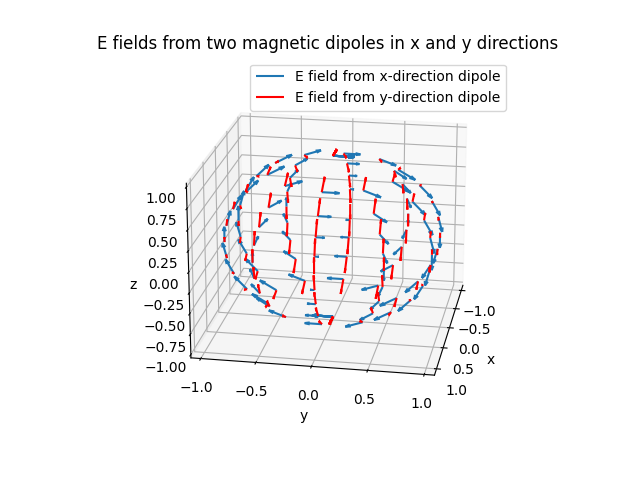

In [17]:
nt=11

T = 1/1e8

p = np.array([[1e-8, 0, 0]])
R = np.array([[0,0,0]])
f = np.array([1e8])
t = 0
phase = np.array([0])

x, y, z, Ex, Bx = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi)

p = np.array([[0, 1e-8, 0]])

x, y, z, Ey, By = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi)

scale_E = 1e-3*r0

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, *Ex, length=scale_E, label='E field from x-direction dipole')
ax.quiver(x, y, z, *Ey, length=scale_E, color='red', label='E field from y-direction dipole')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=20., azim=10)
plt.title('E fields from two magnetic dipoles in x and y directions')
plt.legend()
plt.show()

Showing the electric fields from two different **magnetic** dipoles, one pointing in the x-direction and one in the y-direction, which are pi/2 out of phase (representing a single dipole rotating in the x-y plane). Again showing the instantaneous field. Note that here both sets of vectors are electric fields, rather than showing the E and B fields as in the previous plots. You can see that on the z-axis, the fields are perpendicular to one another (see also the next plot, which shows the fields have the same magnitude as well, indicating circular polarization along the axis). In the x-y plane at z=0, the fields electric fields point only in the +/- z direction; plane polarization in the z-direction

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


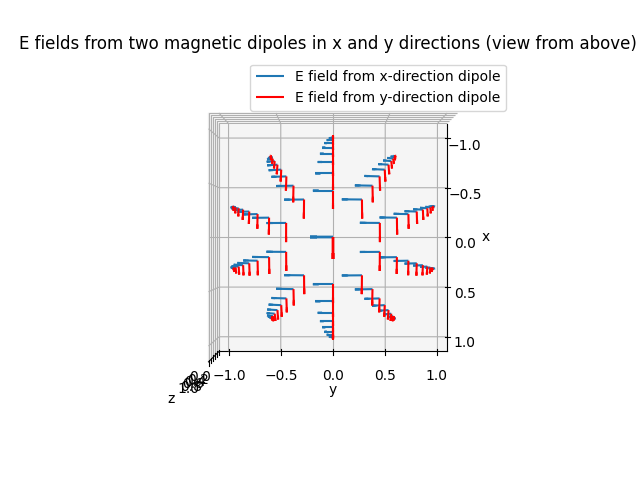

In [16]:
nt=21

T = 1/1e8

p = np.array([[1e-8, 0, 0]])
R = np.array([[0,0,0]])
f = np.array([1e8])
t = T/2
phase = np.array([0])

x, y, z, Ex, Bx = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)

p = np.array([[0, 1e-8, 0]])

x, y, z, Ey, By = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)



scale_E = 1e-3*r0

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, *Ex, length=scale_E, label='E field from x-direction dipole')
ax.quiver(x, y, z, *Ey, length=scale_E, color='red', label='E field from y-direction dipole')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=90., azim=0)
plt.title('E fields from two magnetic dipoles in x and y directions (view from above)')
plt.legend()
plt.show()

As before, but showing the fields from above. This shows that the component of the fields in the x/y plane diminishes towards larger theta.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


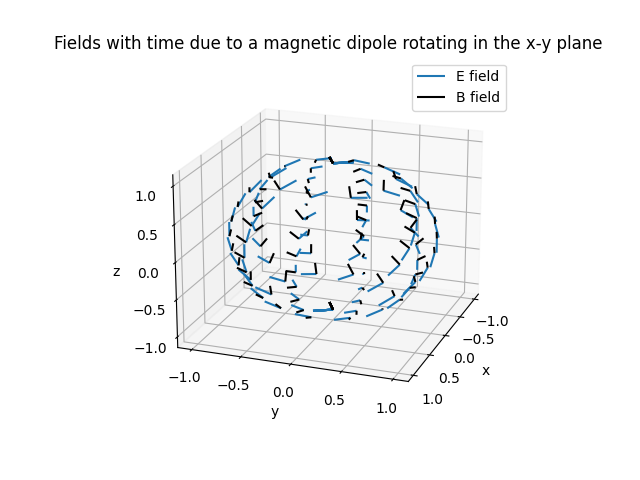

In [7]:
from matplotlib.animation import FuncAnimation

def update_quiver(i, Q1, Q2, x, y, z, scale, scale_B):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    p = np.array([[1e-8, 0, 0], [0, 1e-8, 0]])
    R = np.array([[0, 0, 0], [0, 0, 0]])
    f = np.array([1e8, 1e8])
    t = 2.5e-10*i
    phase = np.array([0, np.pi / 2])

    _, _, _, E, B = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi)

    segments = (x, y, z, x + scale*E[0], y + scale*E[1], z + scale*E[2])
    segments = np.array(segments).reshape(6, -1)
    new_segs = [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]


    Q1.set_segments(new_segs)

    segments = (x, y, z, x + scale_B*B[0], y + scale_B*B[1], z + scale_B*B[2])
    segments = np.array(segments).reshape(6, -1)
    new_segs = [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

    Q2.set_segments(new_segs)

    return Q1, Q2

nt = 11
nph = 10

T = 1 / 1e8

p = np.array([[1e-8, 0, 0], [0, 1e-8, 0]]) # two dipoles
R = np.array([[0, 0, 0], [0, 0, 0]])
f = np.array([1e8, 1e8])
t = 0
phase = np.array([0, np.pi/2]) # phase difference

x, y, z, E, B = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi)

scale = r0/2000
scale_B = (E_max_mag/B_max_mag)*scale

fig = plt.figure()
ax = fig.gca(projection='3d')
Q1 = ax.quiver(x, y, z, *E, pivot='middle', label='E field', length=scale)
Q2 = ax.quiver(x, y, z, *B, pivot='middle', color='black', label='B field', length=scale_B)

ax.set_xlim(-1.1*r0, 1.1*r0)
ax.set_ylim(-1.1*r0, 1.1*r0)
ax.set_zlim(-1.1*r0, 1.1*r0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = FuncAnimation(fig, update_quiver, fargs=(Q1, Q2, x, y, z, scale, scale_B),
                               interval=100, blit=False)
ax.view_init(elev=20., azim=20)

plt.legend()
plt.title('Fields with time due to a magnetic dipole rotating in the x-y plane')
plt.show()


Animation showing the time evolution of the fields (now showing the electric and magnetic fields which result from the rotating magnetic dipole in the x-y plane, rather than showing the electric field contributions as in the previous two plots). Looking at the top point (x=y=0, on the z axis), we can clearly see the rotating E and B fields with constant magnitude; circular polarization. In the x-y plane, the E-field is always completely in the z-direction (this is more clearly visible in the next animation). Everywhere else, there is elliptical polarization; there is transition from circular polarization at theta=0 (on the z-axis) to plane polarization at theta=pi/2, with the polarization ellipse getting more and more 'squished'. You can see this by looking at the shape the electric field vector (blue line) traces out over a period.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


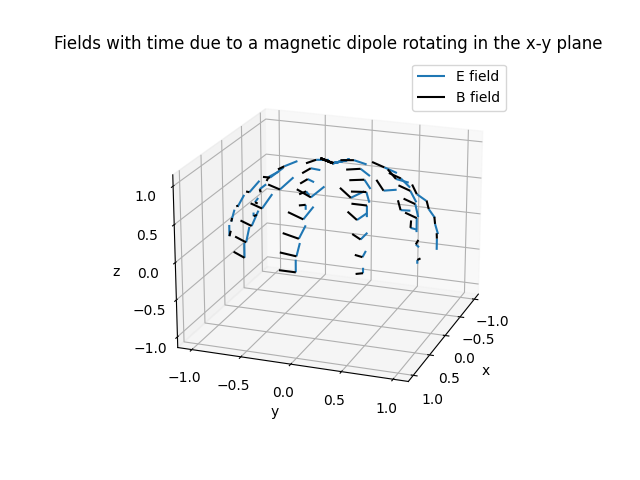

In [8]:
def update_quiver(i, Q1, Q2, x, y, z, scale, scale_B):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    p = np.array([[1e-8, 0, 0], [0, 1e-8, 0]])
    R = np.array([[0, 0, 0], [0, 0, 0]])
    f = np.array([1e8, 1e8])
    t = 2.5e-10*i
    phase = np.array([0, np.pi / 2])

    _, _, _, E, B = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)

    segments = (x, y, z, x + scale*E[0], y + scale*E[1], z + scale*E[2])
    segments = np.array(segments).reshape(6, -1)
    new_segs = [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]


    Q1.set_segments(new_segs)

    segments = (x, y, z, x + scale_B*B[0], y + scale_B*B[1], z + scale_B*B[2])
    segments = np.array(segments).reshape(6, -1)
    new_segs = [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

    Q2.set_segments(new_segs)

    return Q1, Q2

nt = 11
nph = 10

T = 1 / 1e8

p = np.array([[1e-8, 0, 0], [0, 1e-8, 0]]) # two dipoles
R = np.array([[0, 0, 0], [0, 0, 0]])
f = np.array([1e8, 1e8])
t = 0
phase = np.array([0, np.pi/2]) # phase difference

x, y, z, E, B = generate_xyz_EB_magnetic(nt, nphi, p, R, f, t, phase, 2*np.pi, np.pi/2)

scale = r0/2000
scale_B = (E_max_mag/B_max_mag)*scale

fig = plt.figure()
ax = fig.gca(projection='3d')
Q1 = ax.quiver(x, y, z, *E, pivot='middle', label='E field', length=scale)
Q2 = ax.quiver(x, y, z, *B, pivot='middle', color='black', label='B field', length=scale_B)

ax.set_xlim(-1.1*r0, 1.1*r0)
ax.set_ylim(-1.1*r0, 1.1*r0)
ax.set_zlim(-1.1*r0, 1.1*r0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = FuncAnimation(fig, update_quiver, fargs=(Q1, Q2, x, y, z, scale, scale_B),
                               interval=100, blit=False)
ax.view_init(elev=20., azim=20)

plt.legend()
plt.title('Fields with time due to a magnetic dipole rotating in the x-y plane')
plt.show()

Showing the same as the above animation, but only the top half of the sphere so things are less confusing. If you look at the bottom 'row' of points, which are exactly at theta=pi/2 (in the x/y plane), you can clearly see that the electric field (blue lines) are always completely in the z direction, oscillating in direction (+ or -z) over the period. 